# Kaggle submissions

* All submissions (3000 teams)
* Our submissions and how we place amongst other competitors (3000 teams...)

In [1]:
# Ugly incantation to make our framework working
import sys
sys.path.insert(0, r'/SAPDevelop/QuoraPairs/BruteForce/Tools')

#import all our small tools (paths, cache, print,zip,excel, pandas, progress,..)
from Tools.all import *

# setup the name of our experiment
# it will be used to store every result in a unique place
EXPERIMENT='kaggle_submissions'
print_alert('You will work on environment %s' %EXPERIMENT)
prepare_environnement(EXPERIMENT)


## All submissions

All submissions until the challenge closed

In [2]:
# Read the whole set of all past submissions
all_submissions = pandas.read_csv('../Results/all_submissions.csv')
#all_submissions = pandas.read_csv('../Results/quora-question-pairs-publicleaderboard.csv')
print_info('Nb submissions %d' % len(all_submissions))

# Group by team and keep the best kaggle score ie the min
min_by_team = all_submissions.sort_values('TeamId').groupby(['TeamId']).min()
assert len(min_by_team) == len(all_submissions['TeamId'].unique())
print_info('Nb teams %d' % len(min_by_team))

# compute ranks

min_by_team['rank%']= min_by_team['Score'].rank(ascending=True,pct=True)*100.
min_by_team['rank'] = min_by_team['Score'].rank(ascending=True,pct=False)

# Zoom on the interesting area ie score < 0.1
min_by_team_1 = min_by_team[min_by_team['Score']<1]
print_info('Nb teams with a kaggle score <1: %d' % len(min_by_team_1))
min_by_team

,TeamName,SubmissionDate,Score,rank%,rank
TeamId,,,,,
525228,DataCanary,02/04/2017,0.72023,85.128983,2805.0
546560,FernandoTN,04/06/2017,0.32220,35.553869,1171.5
546564,Human Being,17/03/2017,0.34406,42.610015,1404.0
546565,anokas,04/06/2017,0.14744,7.010622,231.0
546580,gavrand,01/06/2017,0.14493,5.948407,196.0
...,...,...,...,...,...
704116,Enzo,01/06/2017,0.16232,17.056146,562.0
704176,Dewey L�,03/06/2017,6.41423,91.714719,3022.0
704201,Chell,04/06/2017,0.40751,62.610015,2063.0


### Just for fun, Here is the whole set of submissions including the stupid ones

* x is the kaggle score
* y is the rank %

For example, if you get a score of 5 (a mistake), 89 % of people has done better than you


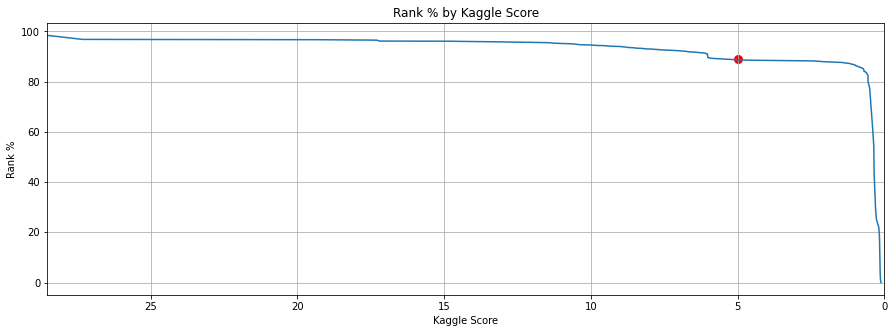

In [16]:
plot.figure(figsize=(15,5))
plot.plot('Score','rank%',data=min_by_team.sort_values('Score'))
plot.xlim(min_by_team['Score'].max(),0)
plot.scatter(5,89,color='red',lw=3)
plot.title('Rank % by Kaggle Score')
plot.xlabel('Kaggle Score')
plot.ylabel('Rank %')
plot.grid(True)

### Now, focus on the interesting part ie where the score < 0.1

the red dot means: 77% of submissions has done better (less) than 0.5

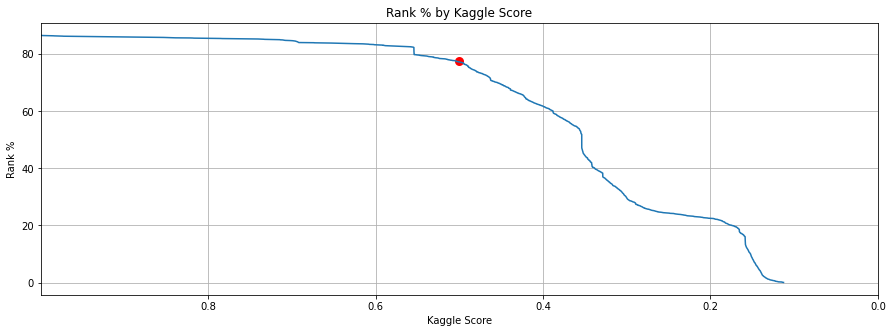

In [20]:
plot.figure(figsize=(15,5))
plot.plot('Score','rank%',data=min_by_team_1.sort_values('Score'))
plot.scatter(0.5,77.5,color='red',lw=3)
plot.xlim(min_by_team_1['Score'].max(),0)
plot.title('Rank % by Kaggle Score')
plot.xlabel('Kaggle Score')
plot.ylabel('Rank %')
plot.grid(True)


### Now, my submissions

In [5]:
# This will need my credentials at kaggle to work
my_submissions = load_kaggle_submissions()

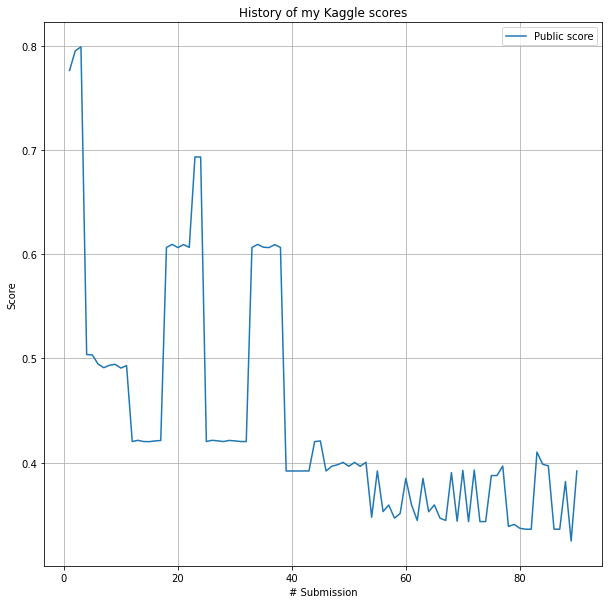

In [6]:
print_info("Nb submissions %d. Fortunately, it was scripted..." % len(my_submissions))
x = numpy.arange(len(my_submissions['description']),0,-1)
width = 0.35
fig = plot.figure(figsize=(10, 10))
plot.plot(x,my_submissions['publicScore'],label='Public score')
plot.ylabel('Score')
plot.xlabel('# Submission')
plot.title('History of my Kaggle scores')
plot.grid(True)
plot.legend()
plot_save('only_my_submissions')
plot.show()


Prepare the merge of global submissions and mines

In [7]:
# Be careful : this can be done only one time

my_submissions['SubmissionDate'] = my_submissions['date']
my_submissions['Score'] = my_submissions['publicScore']
my_submissions = my_submissions.drop(columns=['date','fileName','privateScore','publicScore'])
my_submissions['TeamName'] ='Alain Charroux'
my_submissions['rank%'] = numpy.nan
my_submissions['rank'] = numpy.nan
min_by_team_1['description'] = None
min_by_team_1.reindex()
assert set(min_by_team_1.columns) == set(my_submissions.columns) 

Merge and Find the rank of all my submissions

In [8]:
merged_submissions = min_by_team.append(my_submissions)
merged_submissions = merged_submissions.sort_values('Score').interpolate()

### Graph everything

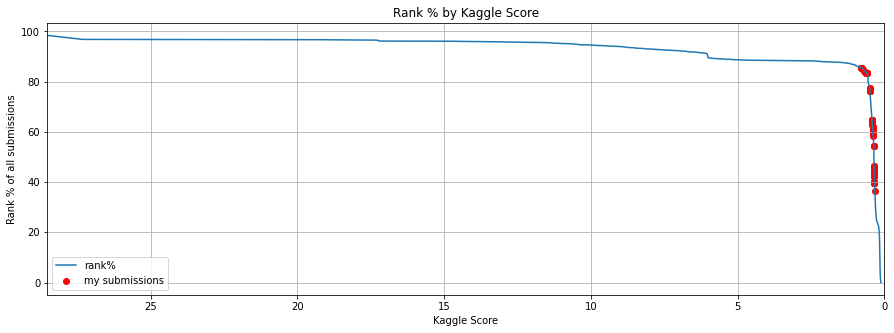

In [21]:
my_submissions_merged = merged_submissions[merged_submissions['TeamName']=='Alain Charroux'] 
plot.figure(figsize=(15,5))
plot.plot('Score','rank%',data = merged_submissions.sort_values('Score'),label='rank%')
plot.xlim(merged_submissions['Score'].max(),0)
plot.scatter('Score','rank%',data=my_submissions_merged,color='red',label='my submissions')
plot.title('Rank % by Kaggle Score')
plot.xlabel('Kaggle Score')
plot.ylabel('Rank % of all submissions')
plot.grid(True)
plot.legend()
plot_save('all_submissions')


### Focus on scores < 1.

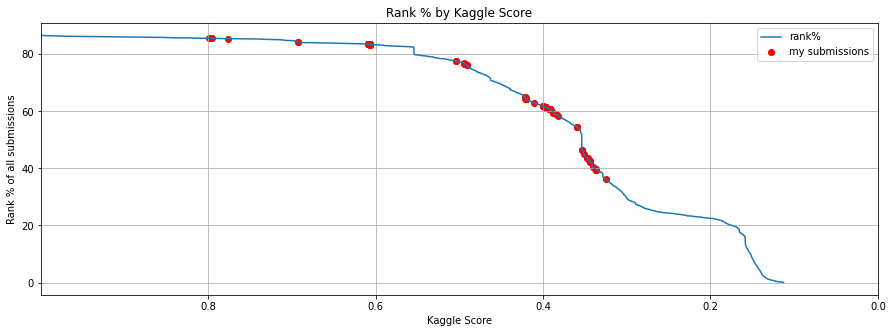

In [22]:
merged_submissions_1 = merged_submissions[merged_submissions['Score']<1]
my_submissions_merged_1 = merged_submissions_1[merged_submissions_1['TeamName']=='Alain Charroux'] 
plot.figure(figsize=(15,5))
plot.plot('Score','rank%',data = merged_submissions_1.sort_values('Score'),label='rank%')
plot.xlim(merged_submissions_1['Score'].max(),0)
plot.scatter('Score','rank%',data=my_submissions_merged_1,color='red',label='my submissions')

plot.title('Rank % by Kaggle Score')
plot.xlabel('Kaggle Score')
plot.ylabel('Rank % of all submissions')
plot.grid(True)
plot.legend()
plot_save('submissions_less_1')


Adding a bit of information on model

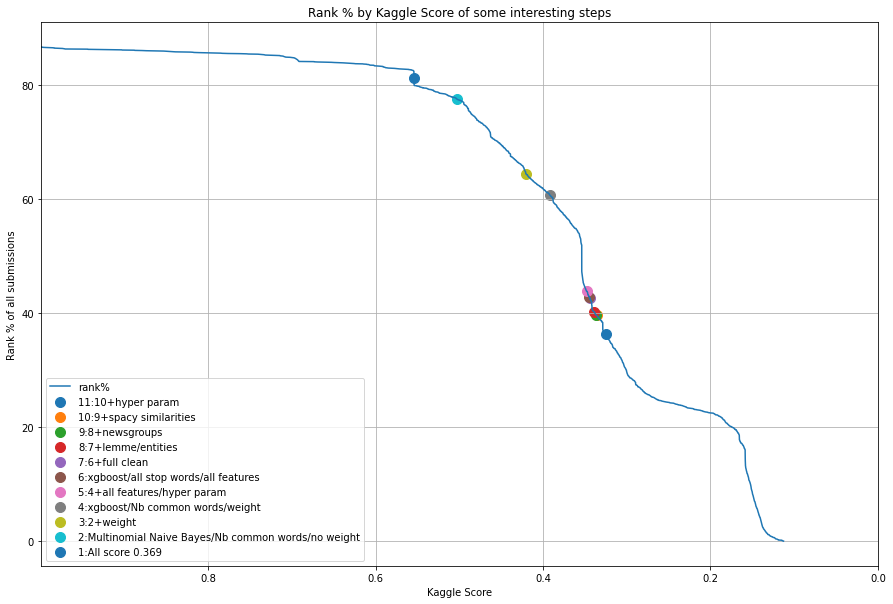

In [23]:
interesting_models = {
    '1:All score 0.369':0.5541,
    '2:Multinomial Naive Bayes/Nb common words/no weight': 0.5021,
    '3:2+weight': 0.4202,
    '4:xgboost/Nb common words/weight': 0.392,
    '5:4+all features/hyper param': 0.348,
    '6:xgboost/all stop words/all features':0.345,
    '7:6+full clean':0.344,
    '8:7+lemme/entities':0.339,
    '9:8+newsgroups':0.337,
    '10:9+spacy similarities':0.336,
    '11:10+hyper param':0.325
}

def place_desc(r):
    plot.scatter(r.Score,r['rank%'],s=100,label=r.description)

# painfull adapt our dict to format of submissions    
models = pandas.DataFrame.from_dict(interesting_models,orient='index').reindex()
#models = pandas.DataFrame()
models['Score'] = models[0]
models['rank%'] = numpy.nan
models['rank'] = numpy.nan
models['TeamName'] = '!'
models['SubmissionDate'] = None
models['description']= models.index

merged_submissions_10 = merged_submissions_1.append(models)
merged_submissions_10 = merged_submissions_10.sort_values('Score').interpolate()
merged_submissions_10 = merged_submissions_10[merged_submissions_10['TeamName']=='!']

palette = sns.color_palette()
plot.figure(figsize=(15,10))
plot.plot('Score','rank%',data = merged_submissions_1.sort_values('Score'))
plot.xlim(merged_submissions_1['Score'].max(),0)
#plot.scatter('Score','rank%',data=my_submissions_merged_1,color='red',s=10)
merged_submissions_10.apply(place_desc,axis=1)
plot.title('Rank % by Kaggle Score of some interesting steps')
plot.xlabel('Kaggle Score')
plot.ylabel('Rank % of all submissions')
plot.legend()
plot.grid(True)
plot_save('submissions_less_1_details')
